In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [6]:
df=pd.read_csv('Salary.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

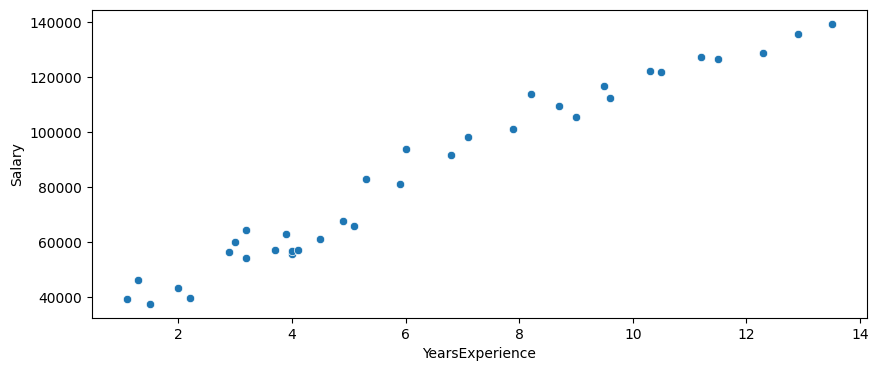

In [9]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

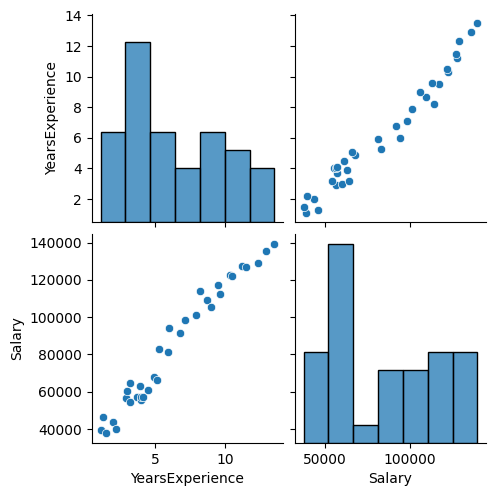

In [10]:
sns.pairplot(data=df)

In [11]:
x=df.drop('Salary',axis=1)
y=df['Salary']
print('X Shape:',x.shape)
print('Y Shape:',y.shape)

X Shape: (35, 1)
Y Shape: (35,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=45)

In [14]:
print('X Train Shape:',x_train.shape)
print('Y Train Shape:',y_train.shape)
print('X Test Shape:',x_test.shape)
print('Y Test Shape:',y_test.shape)

X Train Shape: (21, 1)
Y Train Shape: (21,)
X Test Shape: (14, 1)
Y Test Shape: (14,)


In [15]:
X_train=x_train.to_numpy()
Y_train=y_train.to_numpy()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)
print(y_pred)
X_test=x_test.to_numpy()
Y_test=y_test.to_numpy()
print(Y_test)

[ 72907.1127663  141830.78251282 112670.76838929  53467.10335062
  64070.74485008  60536.19768359 147132.60326255  56118.01372548
  62303.47126684  80859.8438909  111787.13159767  54350.74014224
  97648.94293172 100299.85330659]
[ 66029 135675 112635  56642  57081  57189 139465  54445  63218  93940
 116969  60150 101302 113812]


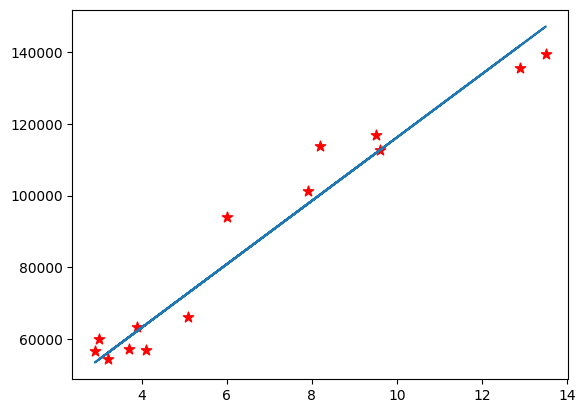

In [20]:
plt.scatter(x_test,y_test,s=60,c='red',marker='*')
plt.plot(X_test,y_pred)

In [21]:
dif=y_test-y_pred
diff=dif.to_numpy()

print(diff)

[-6878.1127663  -6155.78251282   -35.76838929  3174.89664938
 -6989.74485008 -3347.19768359 -7667.60326255 -1673.01372548
   914.52873316 13080.1561091   5181.86840233  5799.25985776
  3653.05706828 13512.14669341]


In [22]:
pd.DataFrame(np.c_[Y_test,y_pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,66029.0,72907.112766,-6878.112766
1,135675.0,141830.782513,-6155.782513
2,112635.0,112670.768389,-35.768389
3,56642.0,53467.103351,3174.896649
4,57081.0,64070.744850,-6989.744850
5,57189.0,60536.197684,-3347.197684
6,139465.0,147132.603263,-7667.603263
7,54445.0,56118.013725,-1673.013725
8,63218.0,62303.471267,914.528733
9,93940.0,80859.843891,13080.156109


C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Salary')

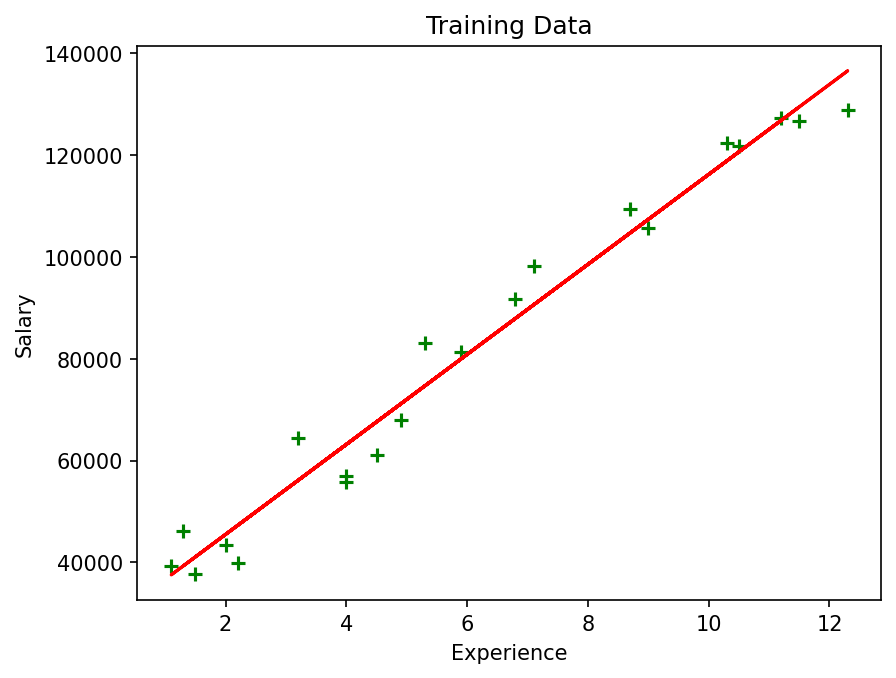

In [23]:
plt.figure(dpi=150)
plt.title('Training Data')
plt.scatter(X_train,Y_train,s=40,c='green',marker='+')
plt.plot(X_train,model.predict(X_train),c='red',label='red line')
plt.xlabel('Experience')
plt.ylabel('Salary')

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Salary')

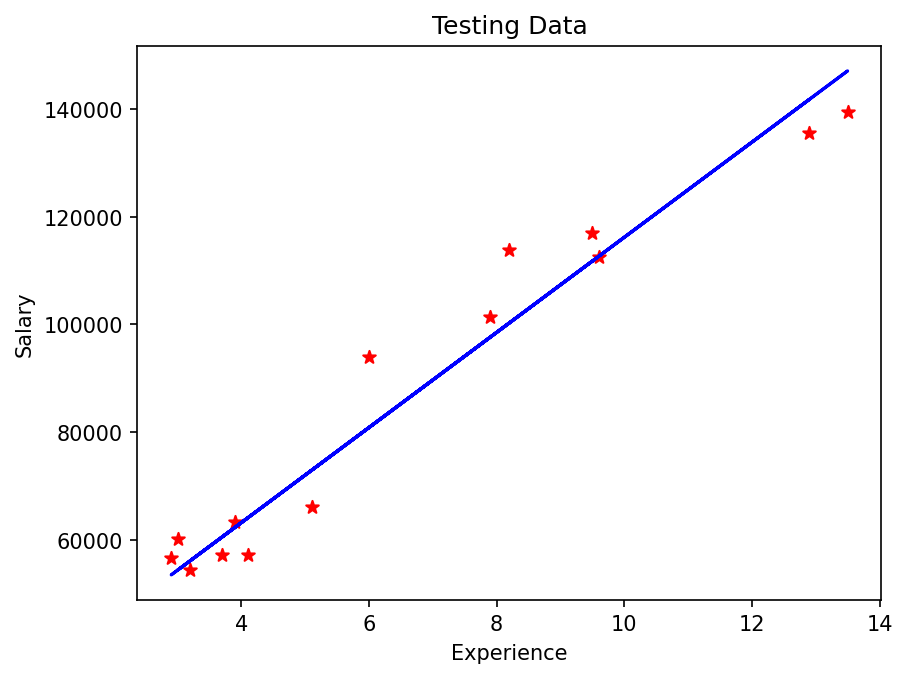

In [24]:
plt.figure(dpi=150)
plt.title('Testing Data')
plt.scatter(X_test,Y_test,s=40,c='red',marker='*')
plt.plot(X_test,model.predict(X_test),c='blue',label='blue line')
plt.xlabel('Experience')
plt.ylabel('Salary')

In [25]:
model.score(X_test,Y_test)

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9508642057360027

In [26]:
model.score(X_train,Y_train)

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9728417924296537

In [27]:
MAE=mean_absolute_error(Y_test,y_pred)
MSE=mean_squared_error(Y_test,y_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,y_pred)

In [28]:
pd.DataFrame([MAE,MSE,RMSE,r2],index=['MAE','MSE','RMSE','r2'],columns=['METRICES'])

,METRICES
MAE,5.575938e+03
MSE,4.609055e+07
RMSE,6.789002e+03
r2,9.508642e-01


In [29]:
exp=2
model.predict([[exp]])[0]
print(f"Salary of {exp} years experience employee is: {int(model.predict([[exp]])[0])} thousand.")

Salary of 2 years experience employee is: 45514 thousand.


C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
